## 1. 서론

### 1.1 분석 배경 및 목적

## 1. 서론

온라인 교육 콘텐츠 시장은 디지털 전환 가속화, 학습 주체의 자율성 확대, 그리고 시·공간 제약 없는 학습 환경 제공을 통해 매년 급격한 성장세를 기록하고 있다. 특히 코로나19 팬데믹을 계기로 오프라인 강의가 비대면 콘텐츠로 대거 전환되면서, 개별 학습자의 요구에 최적화된 맞춤형 강의 제공 및 학습 효과 측정에 대한 수요가 더욱 증대되었다. 본 분석의 목적은 서비스 이용자의 행동 패턴을 정밀히 진단하여, 운영 중인 교육 상품의 강·약점을 객관적으로 파악하고, 데이터 기반 인사이트를 도출함으로써 비즈니스 가치를 극대화하는 데 있다.

연구 대상은 유저의 접속 및 학습 여정 전반에 걸친 로그 데이터로서, 메인페이지 진입, 회원가입, 강의 페이지 방문, 수강 시작·완료, 후기 확인 등 주요 접점이 포함된다. 특히 콘텐츠 난이도별 수강 전환율, 레슨별 이탈 구간, 무료 체험 유입 후 유료 전환 시점 등 핵심 지표를 중심으로 유저 행동을 세분화하여 분석한다. 이를 통해 ‘어떤 유형의 사용자’가 ‘어떤 경로로’ 서비스를 이용하며, ‘어느 시점에’ 이탈 또는 결제로 이어지는지를 체계적으로 규명할 것이다.

이어서, 분석 결과를 토대로 구체적인 서비스 개선 방안을 제시한다. 예컨대 특정 난이도 구간에서 이탈률이 과도하게 발생할 경우, 레슨 구성 및 난이도 재조정 또는 보조 학습 자료 제공 여부를 검토하고, 무료 체험 후 유료 전환율 제고를 위해 체험 기간 중 핵심 가치 제안 강화 및 타깃별 맞춤 프로모션 설계 방안을 모색한다. 마지막으로 제안된 개선 과제에 대한 우선순위를 설정하고, 이후 A/B 테스트 및 전환율 모니터링 계획을 포함한 실행 로드맵을 제안함으로써 실질적 개선 성과를 확보하고자 한다.

## 2. 목표 설정 및 가설 정의


### 2.1 주제

구독 서비스 로그 데이터를 이용한 사용자 세그먼트 분석

### 2.2 목표

### 2.3 실험 가설

### 2.4 AARRR 프레임 워크 정의

| 구분 | 지표 | 설명 | 비고 |
| --- | --- | --- | --- |
| Acquisition | 2022년 이후 가입 유저 수 | 실험 대상 풀 정의 | 가입 발생 시점을 기준으로 추출 |
| Activation (A-ha Moment) | 최소 1개 레슨 시작(`enter_lesson`) | ‘가치 체험’ 최초 시점 측정 | `enter_lesson` 이벤트 발생 |
| Retention | Day 1 재방문율 (2022년 이후 Activation 기준) | Activation 다음 날에 서비스 접속 비율 | `client_event_time` 기준 |
| Revenue | 실제 구독으로 이어진 유저 수 | 구독 관련 데이터에 로그가 남아 있는 유저 수 | `client_event_time` 기준 |

## 3. 분석 환경 준비

### 3.1 분석 환경 설정

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
os.chdir('C:/Users/Yoo/Desktop/codeit/중급 프로젝트/주제 2/Data')

### 3.2 데이터 정의

온라인 교육 콘텐츠 구독서비스의 2년 기간의 (2022.01.01 - 2023.12.31) 온라인 서비스 유저 행동 데이터

- 데이터 정의서

| 구분 | 이벤트 키 | 설명 | 주요 파라미터 | 비고 |
| --- | --- | --- | --- | --- |
| 가입 | enter.main_page | 서비스 메인페이지 진입 |  |  |
| 가입 | enter.signup_page | 회원가입 페이지 진입 |  |  |
| 가입 | complete.signup | 회원가입 완료 | 로그인 방식 |  |
| 수강 | click.content_page_start_content_button | 콘텐츠 수강하기 버튼 클릭 | 콘텐츠 id, 버튼 이름 |  |
| 수강 | click.content_page_more_review_button | 콘텐츠 후기 더보기 버튼 클릭 | 콘텐츠 id |  |
| 수강 | start.content | 콘텐츠 수강 시작 | 콘텐츠 id, 콘텐츠 이용가, 콘텐츠 난이도 | 22년 8월부터 수집된 테이블입니다. |
| 수강 | enter.lesson_page | 레슨 시작 | 콘텐츠 id, 레슨 id, 무료체험 여부 | 콘텐츠는 여러 개의 레슨으로 구성되어 있습니다. |
| 수강 | complete.lesson | 레슨 완료 | 콘텐츠 id, 레슨 id |  |
| 수강 | click_lesson_page_related_question_box | 레슨 페이지 내 질문 목록 클릭 | 콘텐츠 id, 레슨 id, 댓글 id |  |
| 수강 | end.content | 콘텐츠 수강 완료 | 콘텐츠 id | 콘텐츠 내 모든 레슨을 시청하면 로그가 쌓임 |
| 수강 | enter.content_page | 콘텐츠 개별 페이지 진입 | 콘텐츠 id |  |
| 구독 및 결제 | enter.payment_page | 결제 페이지 진입 |  |  |
| 구독 및 결제 | complete.subscription | 첫 결제 완료 | 정상가, 할인가, 할인액, 결제수단 타입 | 첫 결제가 중복이면 환불 후 재결제한 케이스로 간주 |
| 구독 및 결제 | renew.subscription | 정기 결제 완료 | 정상가, 할인가, 할인액, 결제수단 타입 |  |
| 구독 및 결제 | resubscribe.subscription | 만료 후 재구독 완료 |  |  |
| 구독 및 결제 | start.free_trial | 서비스 무료체험 시작 | 콘텐츠 id, 요금제 종류, 정상가 |  |
| 구독 및 결제 | click.cancel_plan_button | 구독 취소 버튼 클릭 |  | 구독 취소 버튼을 클릭했다면 구독 취소가 이루어진 것으로 간주 |

- 공통 컬럼 (모든 데이터에 공통으로 존재하는 컬럼입니다.)

| 필드 | 설명 | 데이터 타입 | 비고 |
| --- | --- | --- | --- |
| city | 접속 위치 | Object | 국내 기준 “시” 단위로 제공하나, 서울의 경우 “구”가 특정이 되는 경우는 “구” 단위로 표기 |
| client_event_time | 타임스탬프 | Object | UTC +0 기준 타임스탬프 |
| country | 접속 국가 | Object |  |
| device_carrier | 사용 이동통신사 | float64 |  |
| device_family | 사용 기기 유형 | Object |  |
| device_type | 사용 기기 | Object |  |
| event_type | 이벤트 유형 | Object | 테이블명과 일치 |
| language | 사용자 설정 언어 | Object |  |
| os_name | 사용 브라우저 이름 | Object |  |
| os_version | 사용 브라우저 버전 | Object |  |
| platform | 사용 플랫폼 | Object |  |
| user_id | 유저 id | Object |  |

- 고유 컬럼

| 이벤트 키 | 설명 | 주요 파라미터 (변수명: 타입) | 비고 |
| --- | --- | --- | --- |
| enter.main_page | 서비스 메인페이지 진입 | – | – |
| enter.signup_page | 회원가입 페이지 진입 | – | – |
| complete.signup | 회원가입 완료 | type: object | 로그인 방식 |
| enter.content_page | 콘텐츠 개별 페이지 진입 | content.id: object | 콘텐츠 ID |
| click.content_page_start_content_button | 콘텐츠 수강하기 버튼 클릭 | content.id: object, button_name: object<br>button.name: object | `button_name`(페이지 개편 전) / `button.name`(페이지 개편 후) |
| click.content_page_more_review_button | 콘텐츠 후기 더보기 버튼 클릭 | content.id: object | 콘텐츠 ID |
| enter.payment_page | 결제 페이지 진입 | – | – |
| complete.subscription | 첫 결제 완료 | plan.price: int64, paid_amount: int64,<br>coupon.discount_amount: int64, pg.type: object | `coupon.discount_amount` = 정상가 − 실제 결제 금액<br>`pg.type` A / B / C = 각기 다른 간편결제 수단 |
| renew.subscription | 정기 결제 완료 | plan.price: int64, paid_amount: int64,<br>coupon.discount_amount: int64, pg.type: object | (위와 동일) |
| resubscribe.subscription | 만료 후 재구독 완료 | plan.price: int64, paid_amount: int64,<br>coupon.discount_amount: int64, pg.type: object | (위와 동일) |
| start.free_trial | 서비스 무료체험 시작 | plan.price: int64, plan.type: object | plan.type : 1 개월 / 12 개월 요금제 선택<br>모든 요금제는 7일 무료체험 가능 (결제수단 등록 필요)<br>7일 이내 해지하지 않으면 자동 결제 |
| start.content | 콘텐츠 수강 시작 | content.id: object, content.difficulty: int64 | – |
| enter.lesson_page | 레슨 시작 | content.id: object, lesson.id: object,<br>is_free_trial: boolean, is_trial: boolean | `is_trial` = 무료 레슨이면서 비구독자 여부 |
| complete.lesson | 레슨 완료 | content.id: object, lesson.id: object | – |
| click_lesson_page_related_question_box | 레슨 페이지 내 질문 목록 클릭 | content.id: object, lesson.id: object,<br>question.id: object | – |
| end.content | 콘텐츠 수강 완료 | content.id: object | 콘텐츠 내 모든 레슨 시청 시 기록 |
| click.cancel_plan_button | 구독 취소 버튼 클릭 | – | 구독 취소로 간주 |


## 4. 데이터 전처리

In [2]:
import glob

# 현재 디렉토리의 모든 파일 목록 확인
all_files = os.listdir('.')
print("전체 파일 리스트:", all_files)

dataframes = {}

for file in all_files:
    if file.endswith('.csv'):
        try:
            df = pd.read_csv(file)
            dataframes[file] = df
            print(f"[CSV] {file} 읽기 완료, shape: {df.shape}")
        except Exception as e:
            print(f"[CSV] {file} 읽기 실패: {e}")
    elif file.endswith('.xlsx') or file.endswith('.xls'):
        try:
            df = pd.read_excel(file)
            dataframes[file] = df
            print(f"[Excel] {file} 읽기 완료, shape: {df.shape}")
        except Exception as e:
            print(f"[Excel] {file} 읽기 실패: {e}")
    else:
        print(f"파일 스킵: {file}")

전체 파일 리스트: ['aa.csv', 'churn.csv', 'click.cancel_plan_button.csv', 'click.content_page_more_review_button.csv', 'click.content_page_start_content_button.csv', 'click.lesson_page_related_question_box.csv', 'complete.lesson.csv', 'complete.signup.csv', 'complete.subscription.csv', 'end.content.csv', 'enter.content_page.csv', 'enter.lesson_page.csv', 'enter.main_page.csv', 'enter.payment_page.csv', 'enter.signup_page.csv', 'renew.subscription.csv', 'resubscribe.subscription.csv', 'start.content.csv', 'start.free_trial.csv', 'user_act.csv', 'user_features.csv', 'user_info.csv']
[CSV] aa.csv 읽기 완료, shape: (7320, 45)
[CSV] churn.csv 읽기 완료, shape: (145133, 25)
[CSV] click.cancel_plan_button.csv 읽기 완료, shape: (17895, 12)
[CSV] click.content_page_more_review_button.csv 읽기 완료, shape: (93962, 13)


C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\3682976183.py:12: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


[CSV] click.content_page_start_content_button.csv 읽기 완료, shape: (172911, 15)
[CSV] click.lesson_page_related_question_box.csv 읽기 완료, shape: (1379136, 15)
[CSV] complete.lesson.csv 읽기 완료, shape: (5405069, 14)
[CSV] complete.signup.csv 읽기 완료, shape: (145133, 13)
[CSV] complete.subscription.csv 읽기 완료, shape: (14289, 16)
[CSV] end.content.csv 읽기 완료, shape: (120582, 13)
[CSV] enter.content_page.csv 읽기 완료, shape: (1914257, 13)


C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\3682976183.py:12: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


[CSV] enter.lesson_page.csv 읽기 완료, shape: (21029707, 16)
[CSV] enter.main_page.csv 읽기 완료, shape: (2133548, 12)
[CSV] enter.payment_page.csv 읽기 완료, shape: (165061, 12)
[CSV] enter.signup_page.csv 읽기 완료, shape: (596829, 12)
[CSV] renew.subscription.csv 읽기 완료, shape: (15945, 16)
[CSV] resubscribe.subscription.csv 읽기 완료, shape: (791, 16)
[CSV] start.content.csv 읽기 완료, shape: (124917, 14)
[CSV] start.free_trial.csv 읽기 완료, shape: (30621, 14)
[CSV] user_act.csv 읽기 완료, shape: (15033460, 9)
[CSV] user_features.csv 읽기 완료, shape: (145133, 23)
[CSV] user_info.csv 읽기 완료, shape: (145133, 5)


In [3]:
# 로그 데이터 불러오기

click_content_page_start_content_button = dataframes['click.content_page_start_content_button.csv']
complete_lesson = dataframes['complete.lesson.csv']
complete_signup = dataframes['complete.signup.csv']
complete_subscription = dataframes['complete.subscription.csv']
enter_lesson = dataframes['enter.lesson_page.csv']

renew_subscription = dataframes['renew.subscription.csv']
resubscribe_subscription = dataframes['resubscribe.subscription.csv']
start_content = dataframes['start.content.csv']
start_free_trial = dataframes['start.free_trial.csv']
enter_main_page = dataframes['enter.main_page.csv']

start_content_click = dataframes['click.content_page_start_content_button.csv']
content_review = dataframes['click.content_page_more_review_button.csv']
question_box = dataframes['click.lesson_page_related_question_box.csv']
enter_content_page = dataframes['enter.content_page.csv']
click_cancel = dataframes['click.cancel_plan_button.csv']

payment_page = dataframes['enter.payment_page.csv']
enter_signup_page = dataframes['enter.signup_page.csv']
end_content = dataframes['end.content.csv']

In [4]:
# 2022년 이전 데이터는 전부 삭제

cutoff = pd.to_datetime('2022-01-01')

dfs = [
    click_content_page_start_content_button, complete_lesson,
    complete_signup, complete_subscription, enter_lesson,
    renew_subscription, resubscribe_subscription, start_content,
    start_free_trial, enter_main_page, start_content_click,
    content_review, question_box, enter_content_page,
    click_cancel, payment_page, enter_signup_page, end_content
]

ts_col = 'client_event_time'  
for i, df in enumerate(dfs):
    df[ts_col] = pd.to_datetime(df[ts_col])
    dfs[i] = df[df[ts_col] >= cutoff].reset_index(drop=True)

# 변수명에 할당
(
    click_content_page_start_content_button, complete_lesson,
    complete_signup, complete_subscription, enter_lesson,
    renew_subscription, resubscribe_subscription, start_content,
    start_free_trial, enter_main_page, start_content_click,
    content_review, question_box, enter_content_page,
    click_cancel, payment_page, enter_signup_page, end_content
) = dfs

In [5]:
import numpy as np

# PC 식별용 패턴
pc_pattern = r'Windows|Mac|Linux|Chromium OS|Ubuntu'

# 모든 DataFrame을 하나의 리스트에 모아두기
dfs = [
    click_content_page_start_content_button,
    complete_lesson,
    complete_signup,
    complete_subscription,
    enter_lesson,
    renew_subscription,
    resubscribe_subscription,
    start_content,
    start_free_trial,
    enter_main_page,
    start_content_click,
    content_review,
    question_box,
    enter_content_page,
    click_cancel,
    payment_page,
    enter_signup_page,
    end_content
]

# 루프 돌면서 device_class 컬럼 생성
for df in dfs:
    df['device_class'] = np.where(
        df['device_type'].str.contains(pc_pattern, case=False, na=False),
        'PC',
        'Mobile'
    )


In [6]:
# 삭제할 컬럼 리스트
drop_cols = [
    'city', 'country', 'device_carrier', 'language',
    'os_name', 'os_version', 'platform', 'device_family', 'device_type'
]


dfs = [
    click_content_page_start_content_button, complete_lesson,
    complete_signup, complete_subscription, enter_lesson,
    renew_subscription, resubscribe_subscription, start_content,
    start_free_trial, enter_main_page, start_content_click,
    content_review, question_box, enter_content_page,
    click_cancel, payment_page, enter_signup_page, end_content
]

for df in dfs:
    df.drop(columns=drop_cols, inplace=True, errors='ignore')


### 4.2 데이터 가공 

In [7]:
# 유저 정보 데이터 프레임 생성

complete_signup

user_info = complete_signup[['user_id', 'client_event_time']].copy()
user_info.rename(columns={'client_event_time': 'signup_time'}, inplace=True)

In [8]:
user_info

,user_id,signup_time
0,74d17c27a41656e7788b0c81d9f76cda,2023-04-05 21:33:26.068
1,06b6868000a5d576180aca47896d6cce,2023-04-05 21:45:18.672
2,e131c319972bd580146c5a2faba26613,2023-04-10 14:47:56.424
3,e3b8bfa80d866f296aad139e09023ef3,2023-04-10 14:25:45.920
4,5208a60918f18562ac9d668a35b20303,2023-04-10 14:09:50.698
...,...,...
145128,0117038cc69fe8a40388ec19bb0a495e,2023-10-10 05:10:04.854
145129,bc1a28ff902daba9399e7f602cc86285,2023-10-10 05:16:31.995
145130,0d507104136f139cbc9f6fa1db365162,2023-10-10 05:27:53.140
145131,298e200203472e5bc0f9a14053e1dfe1,2023-10-10 05:33:30.471


In [9]:
# user_info에 aha_moment 컬럼 추가
# aha_moment는 첫 레슨 수강 일
aha_moment = enter_lesson.groupby('user_id')['client_event_time'].min().reset_index()
aha_moment.rename(columns={'client_event_time': 'aha_moment'}, inplace=True)

In [10]:
aha_moment.sort_values(by='aha_moment')
# user_info와 aha_moment 병합
user_info = user_info.merge(aha_moment, on='user_id', how='left')


In [11]:
# user_info에 각 회원가입 코호트 추가
# 회원가입 코호트는 회원가입 날짜 기준으로 1개월 단위로 나누기
user_info['signup_cohort'] = user_info['signup_time'].dt.to_period('M')

user_info


,user_id,signup_time,aha_moment,signup_cohort
0,74d17c27a41656e7788b0c81d9f76cda,2023-04-05 21:33:26.068,NaT,2023-04
1,06b6868000a5d576180aca47896d6cce,2023-04-05 21:45:18.672,2023-04-05 21:50:20.141,2023-04
2,e131c319972bd580146c5a2faba26613,2023-04-10 14:47:56.424,2023-04-10 14:48:08.655,2023-04
3,e3b8bfa80d866f296aad139e09023ef3,2023-04-10 14:25:45.920,2023-04-10 14:28:18.546,2023-04
4,5208a60918f18562ac9d668a35b20303,2023-04-10 14:09:50.698,NaT,2023-04
...,...,...,...,...
145128,0117038cc69fe8a40388ec19bb0a495e,2023-10-10 05:10:04.854,2023-10-10 05:10:26.984,2023-10
145129,bc1a28ff902daba9399e7f602cc86285,2023-10-10 05:16:31.995,2023-10-10 05:17:45.578,2023-10
145130,0d507104136f139cbc9f6fa1db365162,2023-10-10 05:27:53.140,2023-11-07 12:30:01.670,2023-10
145131,298e200203472e5bc0f9a14053e1dfe1,2023-10-10 05:33:30.471,NaT,2023-10


In [12]:
user_info['is_aha_moment'] = user_info['aha_moment'].notnull().astype(int) # yes: 1, no: 0
user_info

,user_id,signup_time,aha_moment,signup_cohort,is_aha_moment
0,74d17c27a41656e7788b0c81d9f76cda,2023-04-05 21:33:26.068,NaT,2023-04,0
1,06b6868000a5d576180aca47896d6cce,2023-04-05 21:45:18.672,2023-04-05 21:50:20.141,2023-04,1
2,e131c319972bd580146c5a2faba26613,2023-04-10 14:47:56.424,2023-04-10 14:48:08.655,2023-04,1
3,e3b8bfa80d866f296aad139e09023ef3,2023-04-10 14:25:45.920,2023-04-10 14:28:18.546,2023-04,1
4,5208a60918f18562ac9d668a35b20303,2023-04-10 14:09:50.698,NaT,2023-04,0
...,...,...,...,...,...
145128,0117038cc69fe8a40388ec19bb0a495e,2023-10-10 05:10:04.854,2023-10-10 05:10:26.984,2023-10,1
145129,bc1a28ff902daba9399e7f602cc86285,2023-10-10 05:16:31.995,2023-10-10 05:17:45.578,2023-10,1
145130,0d507104136f139cbc9f6fa1db365162,2023-10-10 05:27:53.140,2023-11-07 12:30:01.670,2023-10,1
145131,298e200203472e5bc0f9a14053e1dfe1,2023-10-10 05:33:30.471,NaT,2023-10,0


In [13]:
# user_info에 있는 user_id만을 대상으로 모든 행동 로그 데이터 생성

all_logs = []
for df in dfs:
    filtered_df = df[df['user_id'].isin(user_info['user_id'])]
    all_logs.append(filtered_df)
# 모든 로그 데이터 합치기
all_logs_df = pd.concat(all_logs, ignore_index=True)
# user_info와 all_logs_df를 user_id를 기준으로 병합


In [14]:
user_act = all_logs_df.merge(user_info, on='user_id', how='left')

In [15]:
user_act

,client_event_time,event_type,user_id,content.id,button.name,button_name,device_class,lesson.id,type,plan.price,...,pg.type,is_trial,is_free_trial,content.difficulty,plan.type,question.id,signup_time,aha_moment,signup_cohort,is_aha_moment
0,2023-04-05 21:14:38.432,click.content_page_start_content_button,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN,PC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-23 05:46:45.942,2022-06-23 05:46:47.189,2022-06,1
1,2023-04-10 14:09:30.564,click.content_page_start_content_button,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa,콘텐츠 이어보기,NaN,PC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-24 23:31:50.498,2023-03-26 23:18:17.489,2023-01,1
2,2023-04-10 14:10:52.368,click.content_page_start_content_button,353528475f2bd85934263421ccd579b3,7de35a9d8f14c68e5f2a8788dda5f72e,콘텐츠 구독하기,NaN,PC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-24 23:31:50.498,2023-03-26 23:18:17.489,2023-01,1
3,2023-04-10 14:31:11.407,click.content_page_start_content_button,f853aa18605bd7f11162236b6b8ac4c5,7de35a9d8f14c68e5f2a8788dda5f72e,콘텐츠 구독하기,NaN,PC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-08 02:04:09.013,2023-03-15 14:36:18.310,2023-02,1
4,2023-04-10 14:57:16.490,click.content_page_start_content_button,2c3e69a22969fb4b765957c5d416a2b8,445fac33232adcb3d1cdab7d8a579430,콘텐츠 이어보기,NaN,PC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-05 08:12:55.718,2023-04-05 08:17:39.000,2023-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15110374,2023-10-10 05:00:49.303,end.content,9fe4efb5bffac9728392d3774c0894f7,d6227ba76134f6cf821bb98b5f235bd0,NaN,NaN,PC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-07 05:03:47.339,2023-09-07 06:05:31.225,2023-09,1
15110375,2023-10-10 05:21:55.287,end.content,86453faaa4d0da97c471665e8d35642b,710ffb5be9f89772b7baa9f62c9c8805,NaN,NaN,PC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-12 08:03:23.420,2023-09-24 14:12:17.450,2023-09,1
15110376,2023-10-10 05:43:45.139,end.content,e209e09abc061bd69f3116ff23dcb56b,f4be1a0fe0e301b03115591777fddf29,NaN,NaN,PC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-04 06:26:55.737,2023-10-04 06:28:48.816,2023-10,1
15110377,2023-10-10 05:13:17.274,end.content,e962f191e86d935bc3cf7a566156a11a,61b6463287573f00de13a930805a52d6,NaN,NaN,PC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-09 07:25:15.091,2023-10-09 07:25:15.811,2023-10,1


In [16]:
user_act = user_act[['client_event_time', 'user_id', 'signup_time', 'event_type', 'aha_moment', 'signup_cohort', 'is_aha_moment', 'device_class']]

In [17]:
user_act

,client_event_time,user_id,signup_time,event_type,aha_moment,signup_cohort,is_aha_moment,device_class
0,2023-04-05 21:14:38.432,41362ad5ebcade2bb1b78344a53e7ccf,2022-06-23 05:46:45.942,click.content_page_start_content_button,2022-06-23 05:46:47.189,2022-06,1,PC
1,2023-04-10 14:09:30.564,353528475f2bd85934263421ccd579b3,2023-01-24 23:31:50.498,click.content_page_start_content_button,2023-03-26 23:18:17.489,2023-01,1,PC
2,2023-04-10 14:10:52.368,353528475f2bd85934263421ccd579b3,2023-01-24 23:31:50.498,click.content_page_start_content_button,2023-03-26 23:18:17.489,2023-01,1,PC
3,2023-04-10 14:31:11.407,f853aa18605bd7f11162236b6b8ac4c5,2023-02-08 02:04:09.013,click.content_page_start_content_button,2023-03-15 14:36:18.310,2023-02,1,PC
4,2023-04-10 14:57:16.490,2c3e69a22969fb4b765957c5d416a2b8,2023-04-05 08:12:55.718,click.content_page_start_content_button,2023-04-05 08:17:39.000,2023-04,1,PC
...,...,...,...,...,...,...,...,...
15110374,2023-10-10 05:00:49.303,9fe4efb5bffac9728392d3774c0894f7,2023-09-07 05:03:47.339,end.content,2023-09-07 06:05:31.225,2023-09,1,PC
15110375,2023-10-10 05:21:55.287,86453faaa4d0da97c471665e8d35642b,2023-09-12 08:03:23.420,end.content,2023-09-24 14:12:17.450,2023-09,1,PC
15110376,2023-10-10 05:43:45.139,e209e09abc061bd69f3116ff23dcb56b,2023-10-04 06:26:55.737,end.content,2023-10-04 06:28:48.816,2023-10,1,PC
15110377,2023-10-10 05:13:17.274,e962f191e86d935bc3cf7a566156a11a,2023-10-09 07:25:15.091,end.content,2023-10-09 07:25:15.811,2023-10,1,PC


In [18]:
user_act.sort_values(by=['signup_time'], inplace=True)

C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\1209729313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_act.sort_values(by=['signup_time'], inplace=True)


In [19]:
# datetime 변환
user_act['signup_time']        = pd.to_datetime(user_act['signup_time'])
user_act['client_event_time']  = pd.to_datetime(user_act['client_event_time'])

# 유저별 마지막 이벤트 시각 계산
user_act['last_event_time'] = user_act.groupby('user_id')['client_event_time'].transform('max')

# signup_time과 마지막 이벤트 시각 차이를 일 단위로 계산
user_act['lasting_day'] = (user_act['last_event_time'] - user_act['signup_time']).dt.days

C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\283785499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_act['signup_time']        = pd.to_datetime(user_act['signup_time'])
C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\283785499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_act['client_event_time']  = pd.to_datetime(user_act['client_event_time'])
C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\283785499.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [20]:
user_act.sort_values(by=['client_event_time'], inplace=True)

C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\3264387821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_act.sort_values(by=['client_event_time'], inplace=True)


In [21]:
user_act

,client_event_time,user_id,signup_time,event_type,aha_moment,signup_cohort,is_aha_moment,device_class,last_event_time,lasting_day
2768453,2022-01-01 00:06:31.232,6b4b4d8e08ce009f8992c546372ce664,2022-01-01 00:06:31.232,complete.signup,NaT,2022-01,0,Mobile,2022-01-01 00:10:03.991,0
13446717,2022-01-01 00:10:03.991,6b4b4d8e08ce009f8992c546372ce664,2022-01-01 00:06:31.232,enter.main_page,NaT,2022-01,0,Mobile,2022-01-01 00:10:03.991,0
2768444,2022-01-01 00:10:21.400,a5b72d5c6dd4e213315225d9fb9bbbca,2022-01-01 00:10:21.400,complete.signup,2022-01-01 00:10:22.068,2022-01,1,Mobile,2022-01-01 00:58:00.241,0
9826442,2022-01-01 00:10:22.068,a5b72d5c6dd4e213315225d9fb9bbbca,2022-01-01 00:10:21.400,enter.lesson_page,2022-01-01 00:10:22.068,2022-01,1,Mobile,2022-01-01 00:58:00.241,0
2768456,2022-01-01 00:10:49.730,81c52556d0605b8221aa897cd2ed740d,2022-01-01 00:10:49.730,complete.signup,NaT,2022-01,0,Mobile,2022-01-01 00:10:49.730,0
...,...,...,...,...,...,...,...,...,...,...
2102268,2023-12-31 23:56:52.291,197e9482850c6efa3bd465338056cce4,2023-07-07 05:39:52.475,complete.lesson,2023-07-08 02:22:29.706,2023-07,1,PC,2023-12-31 23:56:52.291,177
11125671,2023-12-31 23:57:46.757,4e75fa4d89e22efaaeb19d7796a1af2b,2023-12-25 13:41:21.823,enter.lesson_page,2023-12-25 13:48:17.220,2023-12,1,PC,2023-12-31 23:57:46.757,6
14789667,2023-12-31 23:58:39.902,7b0e13e15554512df3c5cec123dcea6d,2023-10-31 02:34:09.758,enter.content_page,2023-10-31 04:26:54.122,2023-10,1,PC,2023-12-31 23:58:48.291,61
11125666,2023-12-31 23:58:48.291,7b0e13e15554512df3c5cec123dcea6d,2023-10-31 02:34:09.758,enter.lesson_page,2023-10-31 04:26:54.122,2023-10,1,PC,2023-12-31 23:58:48.291,61


In [22]:
user_act['client_event_time'] = pd.to_datetime(user_act['client_event_time'])
user_act['aha_moment']       = pd.to_datetime(user_act['aha_moment'])

# 2) 두 시점의 차이를 일(day) 단위로 계산
user_act['since_aha_date'] = (user_act['client_event_time'] - user_act['aha_moment']).dt.days


C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\3722517565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_act['client_event_time'] = pd.to_datetime(user_act['client_event_time'])
C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\3722517565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_act['aha_moment']       = pd.to_datetime(user_act['aha_moment'])
C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\3722517565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [23]:
user_act['since_aha_date'] = user_act['since_aha_date'].fillna(0).clip(lower=0).astype(int)

C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\1566131591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_act['since_aha_date'] = user_act['since_aha_date'].fillna(0).clip(lower=0).astype(int)


In [24]:
user_act

,client_event_time,user_id,signup_time,event_type,aha_moment,signup_cohort,is_aha_moment,device_class,last_event_time,lasting_day,since_aha_date
2768453,2022-01-01 00:06:31.232,6b4b4d8e08ce009f8992c546372ce664,2022-01-01 00:06:31.232,complete.signup,NaT,2022-01,0,Mobile,2022-01-01 00:10:03.991,0,0
13446717,2022-01-01 00:10:03.991,6b4b4d8e08ce009f8992c546372ce664,2022-01-01 00:06:31.232,enter.main_page,NaT,2022-01,0,Mobile,2022-01-01 00:10:03.991,0,0
2768444,2022-01-01 00:10:21.400,a5b72d5c6dd4e213315225d9fb9bbbca,2022-01-01 00:10:21.400,complete.signup,2022-01-01 00:10:22.068,2022-01,1,Mobile,2022-01-01 00:58:00.241,0,0
9826442,2022-01-01 00:10:22.068,a5b72d5c6dd4e213315225d9fb9bbbca,2022-01-01 00:10:21.400,enter.lesson_page,2022-01-01 00:10:22.068,2022-01,1,Mobile,2022-01-01 00:58:00.241,0,0
2768456,2022-01-01 00:10:49.730,81c52556d0605b8221aa897cd2ed740d,2022-01-01 00:10:49.730,complete.signup,NaT,2022-01,0,Mobile,2022-01-01 00:10:49.730,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2102268,2023-12-31 23:56:52.291,197e9482850c6efa3bd465338056cce4,2023-07-07 05:39:52.475,complete.lesson,2023-07-08 02:22:29.706,2023-07,1,PC,2023-12-31 23:56:52.291,177,176
11125671,2023-12-31 23:57:46.757,4e75fa4d89e22efaaeb19d7796a1af2b,2023-12-25 13:41:21.823,enter.lesson_page,2023-12-25 13:48:17.220,2023-12,1,PC,2023-12-31 23:57:46.757,6,6
14789667,2023-12-31 23:58:39.902,7b0e13e15554512df3c5cec123dcea6d,2023-10-31 02:34:09.758,enter.content_page,2023-10-31 04:26:54.122,2023-10,1,PC,2023-12-31 23:58:48.291,61,61
11125666,2023-12-31 23:58:48.291,7b0e13e15554512df3c5cec123dcea6d,2023-10-31 02:34:09.758,enter.lesson_page,2023-10-31 04:26:54.122,2023-10,1,PC,2023-12-31 23:58:48.291,61,61


In [25]:
user_act['signup_time']       = pd.to_datetime(user_act['signup_time'])
user_act['client_event_time'] = pd.to_datetime(user_act['client_event_time'])

user_act['last_event_time'] = user_act.groupby('user_id')['client_event_time'].transform('max')

user_act['lasting_day'] = (user_act['last_event_time'] - user_act['signup_time']).dt.days

user_act = user_act.drop(columns=['last_event_time'])

C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\2864977438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_act['signup_time']       = pd.to_datetime(user_act['signup_time'])
C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\2864977438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_act['client_event_time'] = pd.to_datetime(user_act['client_event_time'])
C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\2864977438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [26]:
user_act.drop_duplicates(inplace=True)

In [27]:
user_act.drop(columns=['signup_time'], inplace=True)

In [28]:
user_act.drop(columns=['device_class'], inplace=True) # 최종적으로 사용하지 않을 것 같아 이전에 만든 컬럼을 제거

In [29]:
user_act

,client_event_time,user_id,event_type,aha_moment,signup_cohort,is_aha_moment,lasting_day,since_aha_date
2768453,2022-01-01 00:06:31.232,6b4b4d8e08ce009f8992c546372ce664,complete.signup,NaT,2022-01,0,0,0
13446717,2022-01-01 00:10:03.991,6b4b4d8e08ce009f8992c546372ce664,enter.main_page,NaT,2022-01,0,0,0
2768444,2022-01-01 00:10:21.400,a5b72d5c6dd4e213315225d9fb9bbbca,complete.signup,2022-01-01 00:10:22.068,2022-01,1,0,0
9826442,2022-01-01 00:10:22.068,a5b72d5c6dd4e213315225d9fb9bbbca,enter.lesson_page,2022-01-01 00:10:22.068,2022-01,1,0,0
2768456,2022-01-01 00:10:49.730,81c52556d0605b8221aa897cd2ed740d,complete.signup,NaT,2022-01,0,0,0
...,...,...,...,...,...,...,...,...
2102268,2023-12-31 23:56:52.291,197e9482850c6efa3bd465338056cce4,complete.lesson,2023-07-08 02:22:29.706,2023-07,1,177,176
11125671,2023-12-31 23:57:46.757,4e75fa4d89e22efaaeb19d7796a1af2b,enter.lesson_page,2023-12-25 13:48:17.220,2023-12,1,6,6
14789667,2023-12-31 23:58:39.902,7b0e13e15554512df3c5cec123dcea6d,enter.content_page,2023-10-31 04:26:54.122,2023-10,1,61,61
11125666,2023-12-31 23:58:48.291,7b0e13e15554512df3c5cec123dcea6d,enter.lesson_page,2023-10-31 04:26:54.122,2023-10,1,61,61


4.2 이상 로그 처리하기

In [30]:
# datetime 변환
user_act['client_event_time'] = pd.to_datetime(user_act['client_event_time'])
user_act['aha_moment']        = pd.to_datetime(user_act['aha_moment'])

# complete.lesson만 있고 enter.lesson_page가 없는 user_id 집합
mask_complete = user_act['event_type'] == 'complete.lesson'
mask_enter    = user_act['event_type'] == 'enter.lesson_page'
complete_ids  = set(user_act.loc[mask_complete, 'user_id'])
enter_ids     = set(user_act.loc[mask_enter,    'user_id'])
invalid_ids   = complete_ids - enter_ids

In [31]:
# invalid_ids 사용자들의 첫 complete.lesson 시점 계산
first_complete = (user_act[mask_complete]
                  .groupby('user_id')['client_event_time']
                  .min()
                  .rename('first_complete_time')
                  .to_frame())

In [32]:
# merge 해서 각 행에 붙이기
user_act = user_act.merge(first_complete, how='left', on='user_id')

# invalid_ids에 대해 aha_moment, is_aha_moment 업데이트
mask_invalid = user_act['user_id'].isin(invalid_ids)
user_act.loc[mask_invalid, 'aha_moment']     = user_act.loc[mask_invalid, 'first_complete_time']
user_act.loc[mask_invalid, 'is_aha_moment']  = 1

# 보조 컬럼 삭제
user_act.drop(columns=['first_complete_time'], inplace=True)

In [33]:
user_act[user_act['is_aha_moment'] == 0]['user_id'].nunique() # 아하 모먼트를 느끼지 않은 사람들 

54653

In [34]:
user_act[user_act['is_aha_moment'] == 1]['user_id'].nunique() # 아하 모먼트를 느낀 사람들

90480

In [35]:
user_info.to_csv('user_info.csv', index=False) # csv 파일로 저장

# 5. 퍼널 분석

### 5.1 퍼널 설정


22년 1월 1일 이후 회원가입 (complete_signup) → 레슨을 1개라도 수강 (enter.lesson_page)한 사람 →  레슨을 완료한 사람 → 결제로 이어진 사람

In [36]:
# 2022-01-01 이후 가입한 유저
signup_df = complete_signup[complete_signup['client_event_time'] >= '2022-01-01']
signup_users = set(signup_df['user_id'].unique())
print("1) 가입(2022-01-01 이후):", len(signup_users))

# 레슨을 1개 이상 시작한 유저
enter_df = enter_lesson[enter_lesson['user_id'].isin(signup_users)]
enter_users = set(enter_df['user_id'].unique())
print("2) 레슨 시작:", len(enter_users))

# 레슨을 완료한 유저
comp_lesson_df = complete_lesson[complete_lesson['user_id'].isin(enter_users)]
comp_lesson_users = set(comp_lesson_df['user_id'].unique())
print("3) 레슨 완료:", len(comp_lesson_users))

# 결제(첫 구독)까지 이어진 유저
subs_df = complete_subscription[complete_subscription['user_id'].isin(comp_lesson_users)]
subs_users = set(subs_df['user_id'].unique())
print("4) 결제 완료:", len(subs_users))

1) 가입(2022-01-01 이후): 145133
2) 레슨 시작: 89724
3) 레슨 완료: 30789
4) 결제 완료: 11226


In [37]:
# 퍼널 DataFrame 생성
funnel = pd.DataFrame({
    'stage': ['회원 가입 완료', '레슨 수강', '레슨 수강 완료', '구독 완료'],
    'unique_users': [
        len(signup_users),
        len(enter_users),
        len(comp_lesson_users),
        len(subs_users)
    ]
})

# Plotly로 퍼널 차트 그리기
import plotly.express as px

fig = px.funnel(
    funnel,
    x='unique_users',
    y='stage',
    title='전환 퍼널 차트'
)
fig.show()

가장 큰 전환 장벽은 “레슨 수강 → 레슨 수강 완료” 구간으로, 레슨을 시작한 사용자 중 2/3가 중도 이탈하는 지점. </br>
최종 구독까지 이어지는 사용자 비율은 매우 낮으므로, 레슨 완료율을 높이는 것이 전체 구독 전환율 개선의 핵심이 될 것으로 보임.

# 6. 탐색적 자료분석

### 6.1 코호트별 리텐션 분석

6.1.1 코호트별 단순 월별 리텐션 분석

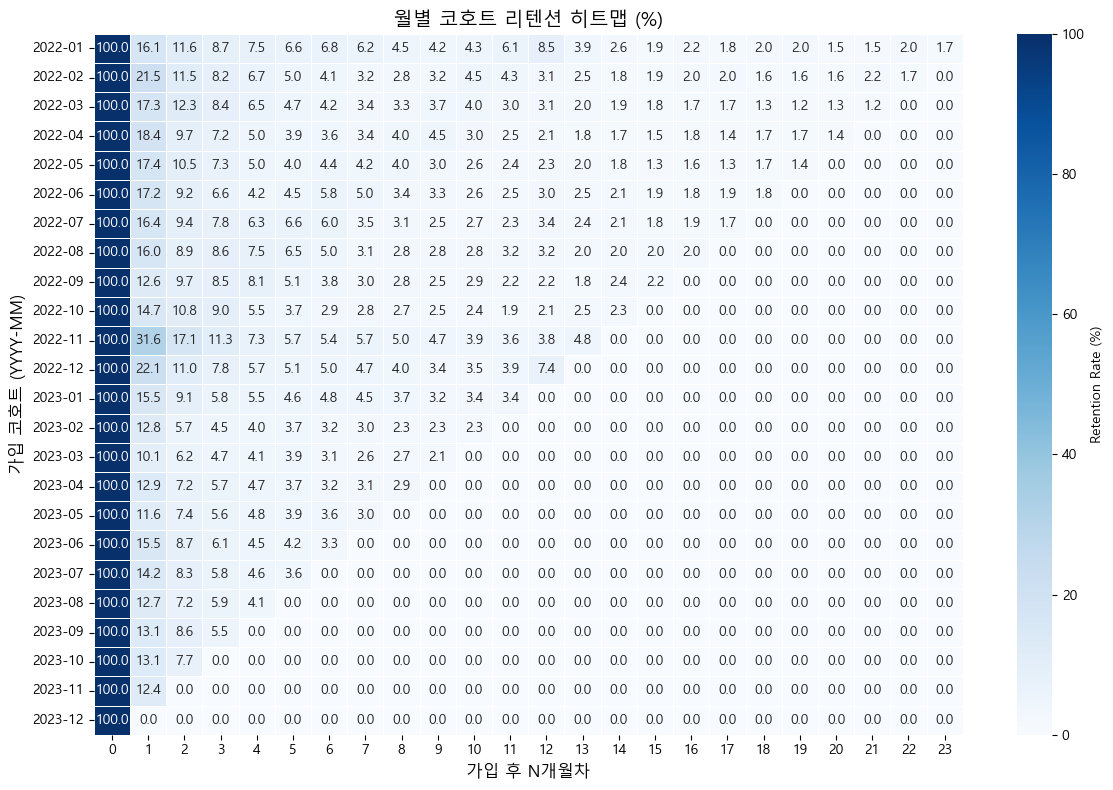

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# datetime 변환 & 개월 차 계산
user_act['client_event_time'] = pd.to_datetime(user_act['client_event_time'])
user_act['signup_month']      = pd.to_datetime(user_act['signup_cohort'].astype(str) + '-01')
user_act['months_since_signup'] = (
      (user_act['client_event_time'].dt.year  - user_act['signup_month'].dt.year) * 12
    + (user_act['client_event_time'].dt.month - user_act['signup_month'].dt.month)
)

# 가입 이전(음수 개월 차) 제거
user_act = user_act[user_act['months_since_signup'] >= 0]

# 중복 제거 & 활성 유저 집계
cohort_month = (
    user_act
    .loc[:, ['user_id','signup_cohort','months_since_signup']]
    .drop_duplicates()
    .groupby(['signup_cohort','months_since_signup'])
    .size()
    .reset_index(name='active_users')
)

# 피벗 & 0개월 차 기준 리텐션 계산
pivot = (
    cohort_month
    .pivot(index='signup_cohort', columns='months_since_signup', values='active_users')
    .fillna(0)
    .sort_index(axis=1)   # 개월 차 오름차순
    .sort_index()         # 코호트 오름차순
)

retention = pivot.div(pivot[0], axis=0) * 100  # 0개월 차 분모, % 단위

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label':'Retention Rate (%)'},
    linewidths=0.5,
    linecolor='white'
)

plt.title('월별 코호트 리텐션 히트맵 (%)', fontsize=14)
plt.xlabel('가입 후 N개월차', fontsize=12)
plt.ylabel('가입 코호트 (YYYY-MM)', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


대체로 많은 사용자들이 1개월 이내에 이탈하는 경향이 뚜렷히 보이나, 2022년 11월 코호트에는 비교적 높은 잔존율을 보였음.

6.1.2 코호트별 롤링 리텐션 분석

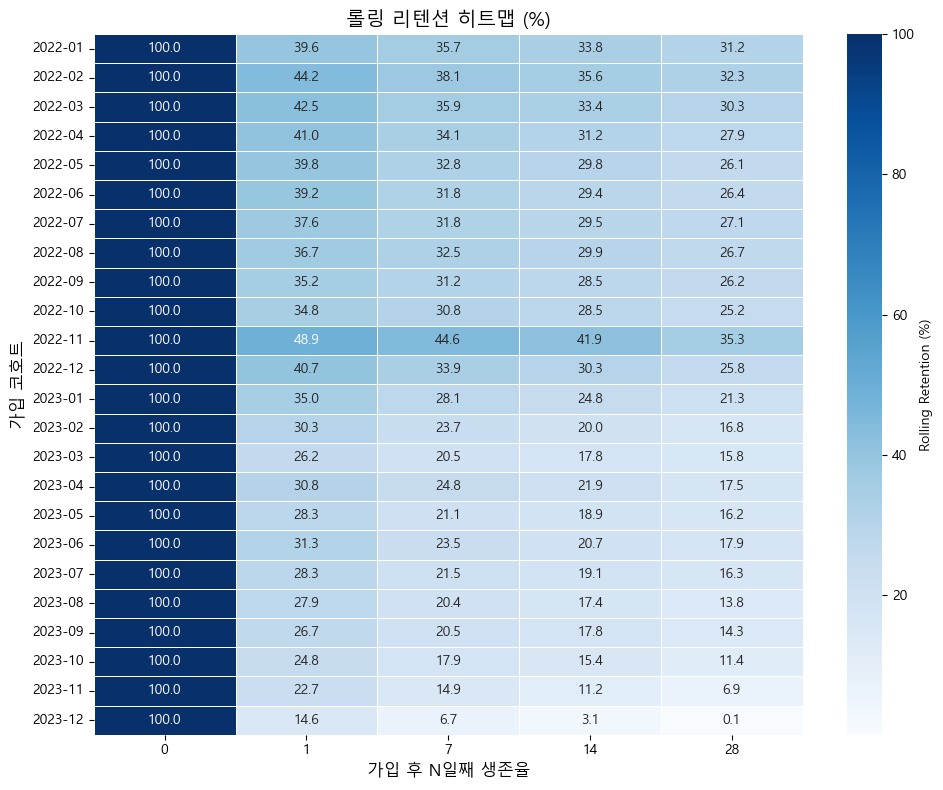

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 유저별 최대 lasting_day (가입 후 마지막 활동일까지) 요약
user_max = (
    user_act
    .groupby(['user_id','signup_cohort'], as_index=False)['lasting_day']
    .max()
)

#  코호트별 가입자 수
cohort_sizes = (
    user_max
    .groupby('signup_cohort')['user_id']
    .nunique()
)

# N일째까지 살아남은 사용자 수 계산
Ns = [0, 1, 7, 14, 28]
records = []
for cohort, total in cohort_sizes.items():
    df_cohort = user_max[user_max['signup_cohort'] == cohort]
    for N in Ns:
        survived = (df_cohort['lasting_day'] >= N).sum()
        pct = survived / total * 100
        records.append({
            'signup_cohort': cohort,
            'day': N,
            'retention_pct': pct
        })

ret_df = (
    pd.DataFrame(records)
      .pivot(index='signup_cohort', columns='day', values='retention_pct')
      .sort_index(axis=0)   # 코호트 오름차순
      .sort_index(axis=1)   # day 오름차순
)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(
    ret_df,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label':'Rolling Retention (%)'},
    linewidths=0.5,
    linecolor='white'
)
plt.title('롤링 리텐션 히트맵 (%)', fontsize=14)
plt.xlabel('가입 후 N일째 생존율', fontsize=12)
plt.ylabel('가입 코호트', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


월별 리텐션이 아닌 한달 이내의 롤링 리텐션을 살펴보았다. </br>
대부분의 사용자들은 0일차에 이탈하는 경향을 보였다. 그렇기 때문에 세부 세그먼트를 분류하여 0일차에 이탈한 사용자들에 대해 분석하고자 한다.

### 6.2 세그먼트 별 분석

세그먼트 1: 아하 모먼트를 느끼고 그 다음날 재방문한 사용자 -> 1일차 재방문 사용자 </br>
세그먼트 2: 그렇지 않은 사용자 -> 0일차 이탈 사용자

6.2.1 세그먼트 별 리텐션 비교

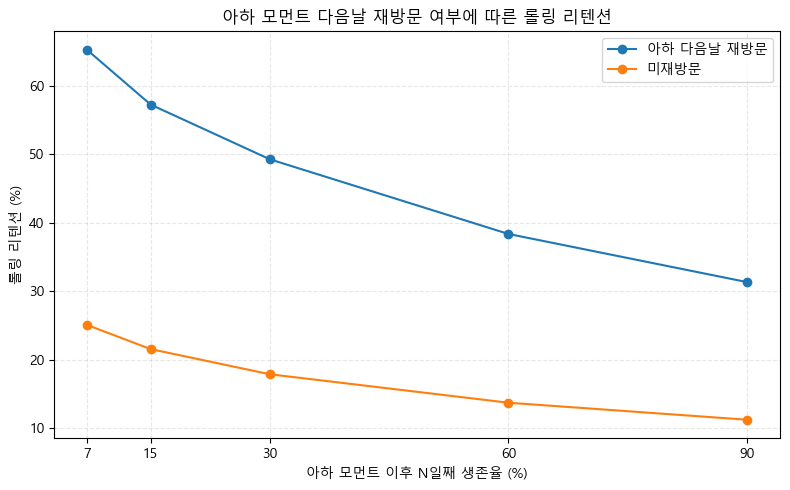

In [40]:
# 유저별 아하 모먼트 시각(최초) 추출
aha_times = (
    user_act
    .dropna(subset=['aha_moment'])
    .sort_values('aha_moment')
    .drop_duplicates('user_id')
    .loc[:, ['user_id','signup_cohort','aha_moment']]
    .rename(columns={'aha_moment':'aha_time'})
)
aha_times['aha_date'] = pd.to_datetime(aha_times['aha_time']).dt.normalize()

# 전체 이벤트에 아하 정보 병합
events = (
    user_act
    .loc[:, ['user_id','client_event_time']]
    .assign(client_event_time=lambda d: pd.to_datetime(d['client_event_time']))
    .merge(aha_times[['user_id','signup_cohort','aha_date']], on='user_id', how='inner')
)

# 아하 모먼트 기준 “며칠 차” 계산
events['days_since_aha'] = (
    events['client_event_time'].dt.normalize()
  - events['aha_date']
).dt.days

# 그룹 나누기: 아하 다음 날(1일 차)에 최소 한 번 오면 A, 아니면 B
next_day_users = (
    events.loc[events['days_since_aha']==1, 'user_id']
    .unique()
)
# 유저별 최대 days_since_aha 요약
aha_user_max = (
    events
    .groupby(['user_id','signup_cohort'], as_index=False)['days_since_aha']
    .max()
)
aha_user_max['next_day_flag'] = aha_user_max['user_id'].isin(next_day_users)

# 롤링 리텐션 계산: N일째까지 살아남은 비율(%)  
Ns = [7, 15, 30, 60, 90]
records = []
for flag, grp in aha_user_max.groupby('next_day_flag'):
    total = len(grp)
    for N in Ns:
        survived = (grp['days_since_aha'] >= N).sum()
        records.append({
            'next_day_flag': flag,
            'days_since_aha': N,
            'retention_pct': survived / total * 100
        })

ret_df = (
    pd.DataFrame(records)
      .pivot(index='days_since_aha', columns='next_day_flag', values='retention_pct')
      .sort_index()
)

# 결과 시각화
plt.figure(figsize=(8,5))
for flag, label in [(True, '아하 다음날 재방문'), (False, '미재방문')]:
    plt.plot(ret_df.index,
             ret_df[flag],
             marker='o',
             label=label)

plt.title('아하 모먼트 다음날 재방문 여부에 따른 롤링 리텐션')
plt.xlabel('아하 모먼트 이후 N일째 생존율 (%)')
plt.ylabel('롤링 리텐션 (%)')
plt.xticks(Ns)
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

6.2.2 세그먼트 별 결제 전환 비교

In [41]:
df = user_act.copy()
df['client_event_time'] = pd.to_datetime(df['client_event_time'])

# Aha 모먼트 시각 정의: enter.lesson_page OR complete.lesson 중 최초 
aha_times = (
    df[df['event_type'].isin(['enter.lesson_page', 'complete.lesson'])]
      .sort_values('client_event_time')
      .drop_duplicates('user_id')
      .loc[:, ['user_id','signup_cohort','client_event_time']]
      .rename(columns={'client_event_time':'aha_time'})
)

# Aha 다음날 재방문 여부 플래그 
visits = (
    df[['user_id','client_event_time']]
      .merge(aha_times, on='user_id', how='inner')
)
visits['days_since_aha'] = (visits['client_event_time'] - visits['aha_time']).dt.days
# Aha 당일 이벤트도 있으니 >=1로 필터
next_day_users = visits.loc[visits['days_since_aha']==1, 'user_id'].unique()

# 결제 플래그 
payment_users = df.loc[df['event_type']=='complete.subscription', 'user_id'].unique()

#  사용자별 플래그 테이블 생성 
user_flag = pd.DataFrame({'user_id': aha_times['user_id']})
user_flag['next_day_return'] = user_flag['user_id'].isin(next_day_users)
user_flag['payment_flag']    = user_flag['user_id'].isin(payment_users)

# 그룹별 결제 전환율 
conv = (
    user_flag
      .groupby('next_day_return')['payment_flag']
      .agg(total_users='count', payers='sum')
      .reset_index()
)
conv['conversion_rate'] = conv['payers'] / conv['total_users'] * 100
conv

#  결제까지 걸린 일수 비교
pay = (
    df[df['event_type']=='complete.subscription']
      .drop_duplicates('user_id')
      .loc[:, ['user_id','client_event_time']]
      .rename(columns={'client_event_time':'payment_time'})
)
df_pay = (
    aha_times[['user_id','aha_time']]
      .merge(pay, on='user_id', how='inner')
)
df_pay['days_to_pay'] = (pd.to_datetime(df_pay['payment_time']) - pd.to_datetime(df_pay['aha_time'])).dt.days
df_pay['next_day_return'] = df_pay['user_id'].isin(next_day_users)

stats_days = df_pay.groupby('next_day_return')['days_to_pay'] \
    .agg(count='count', mean='mean', median='median') \
    .reset_index()


C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\4130724526.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




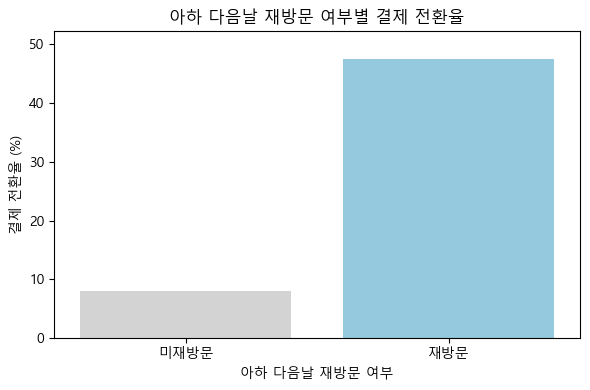

In [42]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x='next_day_return', 
    y='conversion_rate', 
    data=conv, 
    palette=['lightgray', 'skyblue']
)
plt.title('아하 다음날 재방문 여부별 결제 전환율')
plt.xlabel('아하 다음날 재방문 여부')
plt.ylabel('결제 전환율 (%)')
plt.xticks([0, 1], ['미재방문', '재방문'])
plt.ylim(0, conv['conversion_rate'].max() * 1.1)
plt.tight_layout()
plt.show()

- 결제 전환률

|    재방문 여부    | 전체 사용자 수 | 결제 사용자 수 | 결제 전환율 (%) |
| :----------: | -------: | -------: | ---------: |
| 미재방문 (False) |   78,293 |    6,276 |      8.02% |
| 재방문   (True) |   12,187 |    5,787 |     47.49% |


재방문 그룹은 약 47.5%가 결제하는 반면, 비재방문 그룹은 불과 8.0%만 결제하는 경향을 확인했음. 

즉, “아하를 느낀 후 하루 만에 돌아오는” 사용자는 그렇지 않은 사용자 대비 결제 확률이 거의 6배 높다고 확인 할 수 있었다.

- 결제까지 소요 기간

|    재방문 여부    | 결제 사용자 수 | 평균 결제 소요일수 | 중앙값 결제 소요일수 |
| :----------: | -------: | ---------: | ----------: |
| 미재방문 (False) |    6,276 |     21.85일 |        0.0일 |
| 재방문   (True) |    5,787 |      4.10일 |        0.0일 |


평균 결제까지 걸린 시간이 미재방문 그룹은 약 21.8일, 재방문 그룹은 약 4.1일로 약 5배 이상 빠르게 결제로 이어지는 것을 확인하였다.
중앙값이 0일인 것은, 상당수가 “아하 당일” 바로 결제까지 진행했다는 것으로 추측할 수 있다.









6.2.3 세그먼트 별 활동일 비교

In [43]:
df = user_act.copy()
df['client_event_time'] = pd.to_datetime(df['client_event_time'])

# Aha 모먼트 시각 (enter OR complete.lesson) 
aha_times = (
    df[df['event_type'].isin(['enter.lesson_page','complete.lesson'])]
      .sort_values('client_event_time')
      .drop_duplicates('user_id')
      .loc[:, ['user_id','client_event_time']]
      .rename(columns={'client_event_time':'aha_time'})
)

# Next-day return 플래그 
visits = (
    df[['user_id','client_event_time']]
      .merge(aha_times, on='user_id', how='inner')
)
visits['days_since_aha'] = (visits['client_event_time'] - visits['aha_time']).dt.days
next_day_users = visits.loc[visits['days_since_aha']==1, 'user_id'].unique()

# 가입 시각 추출 
signup = (
    df[df['event_type']=='complete.signup']
      .sort_values('client_event_time')
      .drop_duplicates('user_id')
      .loc[:, ['user_id','client_event_time']]
      .rename(columns={'client_event_time':'signup_time'})
)

# 첫 30일 이벤트 머지 & days_since_signup 계산 
ua = (
    df[['user_id','client_event_time']]
      .merge(signup, on='user_id')
)
ua['days_since_signup'] = (ua['client_event_time'] - ua['signup_time']).dt.days

first30 = ua[(ua['days_since_signup'] >= 0) & (ua['days_since_signup'] < 30)].copy()
first30['activity_date'] = first30['client_event_time'].dt.date

# user × date 중복 제거 & 활동 일수 계산 
user_active = (
    first30
      .drop_duplicates(['user_id','activity_date'])
      .groupby('user_id')['activity_date']
      .nunique()
      .reset_index(name='active_days')
)
user_active['next_day_return'] = user_active['user_id'].isin(next_day_users)

# 통계 요약
stats_active = user_active.groupby('next_day_return')['active_days'] \
    .agg(count='count', mean='mean', median='median', std='std') \
    .reset_index()


- 첫 30일간 활동 일수

|    재방문 여부    |   사용자 수 | 평균 활동일수 | 중앙값 활동일수 | 표준편차 |
| :----------: | ------: | ------: | -------: | ---: |
| 미재방문 (False) | 132,946 |   1.55일 |     1.0일 | 1.96 |
| 재방문   (True) |  12,187 |   8.04일 |     5.0일 | 6.93 |


첫달(30일) 동안 미재방문 그룹은 평균 1.6일만 서비스에 방문한 반면, 재방문 그룹은 평균 8.0일, 중앙값 5일정도 활동하였다.

재방문 그룹이 약 5배 이상 자주 참여하여, 초기 Engagement 강도가 훨씬 높은 것으로 확인하였다.

C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\1040688129.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




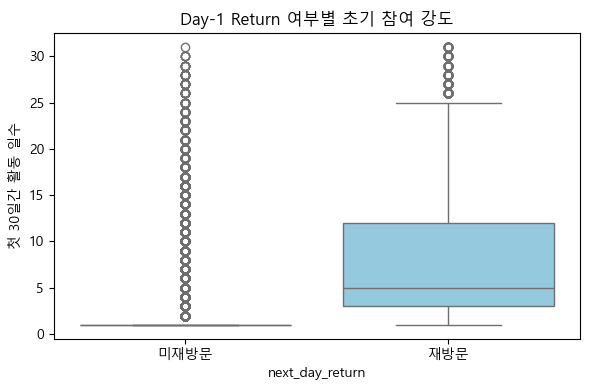

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='next_day_return', y='active_days',
    data=user_active,
    palette=['lightgray','skyblue']
)
plt.xticks([0,1],['미재방문','재방문'])
plt.ylabel('첫 30일간 활동 일수')
plt.title('Day-1 Return 여부별 초기 참여 강도')
plt.tight_layout()
plt.show()

6.2.4 세그먼트 별 LTV 비교

In [45]:
df = user_act.copy()
payment_log = pd.concat([resubscribe_subscription, renew_subscription, complete_subscription], axis=0, ignore_index=True) # 결제 로그 통합

In [46]:
drop_col = ['pg.type', 'device_class', 'paid_amount', 'coupon.discount_amount']

payment_log.drop(columns=drop_col, inplace=True, errors='ignore')

In [47]:
payment_log.sort_values(by='user_id', inplace=True)

In [48]:
aha_times = (
    user_act[user_act['event_type'].isin(['enter.lesson_page', 'complete.lesson'])]
      .sort_values('client_event_time')
      .drop_duplicates('user_id')
      .loc[:, ['user_id', 'signup_cohort', 'client_event_time']]
      .rename(columns={'client_event_time': 'aha_time'})
)

In [49]:
visits = (
    user_act[['user_id', 'client_event_time']]
      .merge(aha_times[['user_id', 'aha_time']], on='user_id', how='inner')
)
visits['days_since_aha'] = (pd.to_datetime(visits['client_event_time']) - 
                            pd.to_datetime(visits['aha_time'])).dt.days
next_day_users = visits.loc[visits['days_since_aha'] == 1, 'user_id'].unique()

In [50]:
payment_log['client_event_time'] = pd.to_datetime(payment_log['client_event_time'])
user_revenue = (
    payment_log
      .groupby('user_id')['plan.price']
      .sum()
      .reset_index(name='total_revenue')
)

In [51]:
user_revenue

,user_id,total_revenue
0,0000572f2ba8079bcefd2760b632e820,47760
1,000087537cbfd934375364218ff10f91,131600
2,0001f15911b404f3bf5b8571afafa4e4,15920
3,000ae43430184824318d11fcd3ae8b45,79200
4,000be07bc09ceff42c11978f4a9f1c1a,181120
...,...,...
16142,fff3e9ffd58cda1d8068d1dab141760a,158400
16143,fffadab35ddc8234e1c5139815bfc017,163440
16144,fffba676b17f9f0f228360930f238f07,131600
16145,fffcae39952c396123f9a3c0808a2183,79600


In [52]:
aha_users = aha_times[['user_id']].drop_duplicates()
user_revenue_full = (
    aha_users
      .merge(user_revenue, on='user_id', how='left')
      .fillna({'total_revenue': 0})
)

In [53]:
user_revenue_full['next_day_return'] = user_revenue_full['user_id'].isin(next_day_users)

In [54]:
ltv_stats = (
    user_revenue_full
      .groupby('next_day_return')['total_revenue']
      .agg(
          total_users='count',
          total_revenue='sum',
          paying_users=lambda x: (x > 0).sum(),
          arpu=lambda x: x.sum() / x.count(),
          arppu=lambda x: x[x > 0].sum() / (x[x > 0].count() if (x > 0).sum() > 0 else 1)
      )
      .reset_index()
)
ltv_stats['paying_rate_%'] = ltv_stats['paying_users'] / ltv_stats['total_users'] * 100

ltv_stats

,next_day_return,total_users,total_revenue,paying_users,arpu,arppu,paying_rate_%
0,False,78293,518376952.0,6523,6620.987215,79469.101947,8.331524
1,True,12187,448105112.0,6009,36769.107410,74572.326843,49.306638


단순히 재방문 여부에 따른 LTV를 비교해보았을때 1일차 재방문 유저보다 그렇지 않은 유저들의 ARPPU (결제 유저당 평균 매출)가 더 높게 잡혀있어

다른 방식으로 추가 분석해보기로 결정

6.2.5 90일 이내의 LTV 비교

In [55]:
merged = (
    aha_times[['user_id','aha_time','signup_cohort']]
    .merge(payment_log[['user_id','client_event_time','plan.price']], on='user_id', how='left')
)

In [56]:
signup_times = (
    user_act[user_act['event_type'] == 'complete.signup']
    .sort_values('client_event_time')
    .drop_duplicates('user_id')                # 유저별 첫번째 signup만 남김
    .loc[:, ['user_id', 'client_event_time']]  # user_id와 가입 시각만 선택
    .rename(columns={'client_event_time':'signup_time'})
)

In [57]:
merged = (
    signup_times
    .merge(payment_log, on='user_id', how='left')
)
merged['days_since_signup'] = (
    merged['client_event_time'] - merged['signup_time']
).dt.days

In [58]:
merged_90 = merged[merged['days_since_signup'] <= 90] # 장기 결제자들을 필터링하기 위해 가입 후 90일 이내 결제자를 추출
user_revenue_90 = merged_90.groupby('user_id')['plan.price'].sum().reset_index(name='revenue_90')

In [59]:
# 1) signup_time 추출 (complete.signup 이벤트 최초 시각)
signup_times = (
    user_act[user_act['event_type'] == 'complete.signup']
    .sort_values('client_event_time')
    .drop_duplicates('user_id')
    .loc[:, ['user_id', 'client_event_time']]
    .rename(columns={'client_event_time': 'signup_time'})
)

# 2) Aha 모먼트 시각(enter.lesson_page OR complete.lesson) 추출
aha_times = (
    user_act[user_act['event_type'].isin(['enter.lesson_page', 'complete.lesson'])]
    .sort_values('client_event_time')
    .drop_duplicates('user_id')
    .loc[:, ['user_id', 'client_event_time']]
    .rename(columns={'client_event_time': 'aha_time'})
)

# 3) “아하 다음날 재방문(next_day_return)” 플래그 생성
visits = (
    user_act[['user_id', 'client_event_time']]
    .merge(aha_times, on='user_id', how='inner')
)
visits['days_since_aha'] = (
    pd.to_datetime(visits['client_event_time']) 
  - pd.to_datetime(visits['aha_time'])
).dt.days

# days_since_aha == 1인 user_id 목록
next_day_users = visits.loc[visits['days_since_aha'] == 1, 'user_id'].unique()

# user_flag DataFrame에 플래그 저장
user_flag = pd.DataFrame({'user_id': aha_times['user_id'].unique()})
user_flag['next_day_return'] = user_flag['user_id'].isin(next_day_users)

# 4) payment_log에 signup_time 병합 및 “가입 후 경과 일수” 계산
payment_log['client_event_time'] = pd.to_datetime(payment_log['client_event_time'])
merged = signup_times.merge(payment_log, on='user_id', how='left')
merged['days_since_signup'] = (merged['client_event_time'] - merged['signup_time']).dt.days

# 5) 가입 후 90일 이내 결제만 필터링
merged_90 = merged[merged['days_since_signup'].between(0, 90)].copy()

# 6) next_day_return 플래그를 merged_90에 병합
merged_90 = merged_90.merge(user_flag, on='user_id', how='left')
merged_90['next_day_return'] = merged_90['next_day_return'].fillna(False)

# 7) 플랜 타입(plan_type) 계산 예시
merged_90['plan_type'] = merged_90['plan.price'].apply(
    lambda x: 'annual'    if x >= 90_000 else
              '3-monthly' if x >= 40_000 else
              'monthly'   if x >= 15_000 else
              'unknown'
)

# 8) 그룹별(재방문 vs. 미재방문) 90일 LTV 지표 계산
user_revenue_90 = (
    merged_90
    .groupby('user_id')['plan.price']
    .sum()
    .reset_index(name='revenue_90')
)

# 모든 Aha 유저 기준으로 revenue_90=0 채우기
aha_users = aha_times[['user_id']].drop_duplicates()
user_revenue_90_full = (
    aha_users
    .merge(user_revenue_90, on='user_id', how='left')
    .fillna({'revenue_90': 0})
)

# next_day_return 플래그 병합
user_revenue_90_full = user_revenue_90_full.merge(user_flag, on='user_id', how='left')
user_revenue_90_full['next_day_return'] = user_revenue_90_full['next_day_return'].fillna(False)

ltv_90_stats = (
    user_revenue_90_full
    .groupby('next_day_return')['revenue_90']
    .agg(
        total_users='count',
        total_revenue_90='sum',
        paying_users_90=lambda x: (x > 0).sum(),
        arpu_90=lambda x: x.sum() / x.count(),
        arppu_90=lambda x: x[x > 0].sum() / (x[x > 0].count() or 1)
    )
    .reset_index()
)
ltv_90_stats['paying_rate_90_%'] = (
    ltv_90_stats['paying_users_90'] / ltv_90_stats['total_users'] * 100
)

# 9) 그룹별 플랜 분포 집계
plan_dist_90 = merged_90.groupby(
    ['next_day_return', 'plan_type']
)['user_id'].count().unstack(fill_value=0)

print("=== 90일 기준 그룹별 LTV 지표 ===")
print(ltv_90_stats.to_string(index=False))
print("\n=== 90일 기준 그룹별 플랜 분포 ===")
print(plan_dist_90)

=== 90일 기준 그룹별 LTV 지표 ===
 next_day_return  total_users  total_revenue_90  paying_users_90      arpu_90     arppu_90  paying_rate_90_%
           False        78293       338420008.0             5558  4322.481039 60888.810363          7.098974
            True        12187       320232664.0             5541 26276.578649 57793.297961         45.466481

=== 90일 기준 그룹별 플랜 분포 ===
plan_type        3-monthly  annual  monthly  unknown
next_day_return                                     
False                 1570    1567     5104       11
True                  1313    1223     5472        3


C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\874481194.py:46: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



- 90일 기준 그룹별 LTV 지표

| next\_day\_return | total\_users | total\_revenue\_90 | paying\_users\_90 |  arpu\_90 | arppu\_90 | paying\_rate\_90\_% |
| :---------------: | -----------: | -----------------: | ----------------: | --------: | --------: | ------------------: |
|       False       |       78,293 |        338,420,008 |             5,558 |  4,322.48 | 60,888.81 |               7.10% |
|        True       |       12,187 |        320,232,664 |             5,541 | 26,276.58 | 57,793.30 |              45.47% |


- 총 사용자 대비 결제 비율(paying_rate_90_% )

    - False(미재방문) 그룹: 7.10%만이 가입 후 90일 이내에 결제

    - True(재방문) 그룹: 45.47%가 가입 후 90일 이내에 결제
        → “아하 모먼트 다음날 재방문” 그룹은 같은 기간 동안 원하는 유저의 거의 절반이 결제에 도달하게 됨.

- ARPU (유저당 평균 매출)

    - False 그룹: 약 4,322원

    - True 그룹: 약 26,277원
        → True 그룹은 미재방문 대비 약 6배 이상 높은 매출을 창출해냈음. 가입 후 90일 이내에 결제율이 훨씬 높기 때문에 전체 유저당 매출도 크게 차이가 나는 것을 확인할 수 있었음.

- ARPPU (결제 유저당 평균 매출)

    - False 그룹: 약 60,889원

    - True 그룹: 약 57,793원
        → 결제한 유저만 놓고 보면, False 그룹(60.9K원)이 True 그룹(57.8K원)보다 다소 높음. 이는 False 그룹 결제 유저 중 일부가 “한 번에 큰 금액(예: 연간 구독·3개월 패키지)”을 결제한 비중이 상대적으로 높기 때문.

- 총 매출(total_revenue_90) 분포

    - False 그룹 전체 매출: 338.4백만 원

    - True 그룹 전체 매출: 320.2백만 원
         False 그룹 인원은 약 6.4배(78,293 vs 12,187) 많지만, 매출 규모는 거의 비슷하다. 즉, 소수 인원이면서 높은 결제율을 보인 True 그룹이, 인원이 많은 False 그룹과 맞먹는 매출을 90일 내에 만들어낸 것을 확인 할 수 있다.

- 90일 기준 그룹별 플랜 분포

| next\_day\_return | 3-monthly | annual | monthly | unknown | 합계(구매 건수) |
| :---------------: | --------: | -----: | ------: | ------: | --------: |
|       False       |     1,570 |  1,567 |   5,104 |      11 |     8,252 |
|        True       |     1,313 |  1,223 |   5,472 |       3 |     8,011 |


6.2.6 세그먼트 별 체류 기간 분석

C:\Users\Yoo\AppData\Local\Temp\ipykernel_145472\1041830590.py:76: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




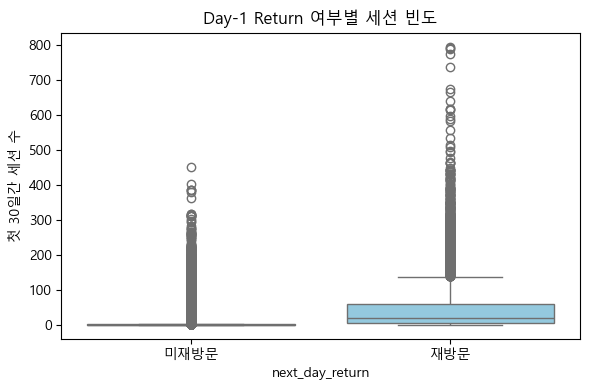

In [60]:
# 1) Aha 모먼트 시각(enter OR complete.lesson) → aha_times
aha_times = (
    user_act[user_act['event_type'].isin(['enter.lesson_page','complete.lesson'])]
    .sort_values('client_event_time')
    .drop_duplicates('user_id')
    .loc[:, ['user_id','client_event_time']]
    .rename(columns={'client_event_time':'aha_time'})
)

# 2) Aha 다음날 재방문 플래그 → next_day_users
visits = (
    user_act[['user_id','client_event_time']]
    .merge(aha_times, on='user_id', how='inner')
)
visits['days_since_aha'] = (pd.to_datetime(visits['client_event_time']) - pd.to_datetime(visits['aha_time'])).dt.days
next_day_users = visits.loc[visits['days_since_aha']==1, 'user_id'].unique()

# 3) 가입 시각 준비 → signup
signup = (
    user_act[user_act['event_type']=='complete.signup']
    .sort_values('client_event_time')
    .drop_duplicates('user_id')
    .loc[:, ['user_id','client_event_time']]
    .rename(columns={'client_event_time':'signup_time'})
)

# 4) 첫 30일 로그 필터 → first30
ua = (
    user_act[['user_id','client_event_time']]
    .merge(signup, on='user_id', how='inner')
)
ua['days_since_signup'] = (pd.to_datetime(ua['client_event_time']) - pd.to_datetime(ua['signup_time'])).dt.days
first30 = ua[(ua['days_since_signup'] >= 0) & (ua['days_since_signup'] < 30)].copy()

# 5) 세션 구분: 이전 이벤트와 5분 이상 공백 시 new_session
first30 = first30.sort_values(['user_id','client_event_time'])
first30['prev_time'] = first30.groupby('user_id')['client_event_time'].shift(1)
first30['time_diff_min'] = (pd.to_datetime(first30['client_event_time']) - pd.to_datetime(first30['prev_time'])).dt.total_seconds()/60
first30['new_session'] = (first30['prev_time'].isna()) | (first30['time_diff_min'] > 5)
first30['session_id'] = first30.groupby('user_id')['new_session'].cumsum()

# 6) 세션별 체류 시간 계산 → sessions
sessions = (
    first30
    .groupby(['user_id','session_id'], as_index=False)
    .agg(
        session_start=('client_event_time','min'),
        session_end=('client_event_time','max')
    )
)
sessions['duration_min'] = (pd.to_datetime(sessions['session_end']) - pd.to_datetime(sessions['session_start'])).dt.total_seconds()/60

# 7) 사용자별 세션 통계 계산 → session_stats
session_stats = (
    sessions
    .groupby('user_id')
    .agg(
        session_count=('session_id','nunique'),
        avg_duration=('duration_min','mean'),
        max_duration=('duration_min','max'),
        min_duration=('duration_min','min')
    )
    .reset_index()
).fillna({
    'session_count':0, 
    'avg_duration':0, 
    'max_duration':0, 
    'min_duration':0
})

# 8) Next-day Return 플래그 병합
session_stats['next_day_return'] = session_stats['user_id'].isin(next_day_users)

# 11) 시각화 예시: session_count 분포 박스플롯
plt.figure(figsize=(6,4))
sns.boxplot(
    x='next_day_return',
    y='session_count',
    data=session_stats,
    palette=['lightgray','skyblue']
)
plt.xticks([0,1], ['미재방문','재방문'])
plt.ylabel('첫 30일간 세션 수')
plt.title('Day-1 Return 여부별 세션 빈도')
plt.tight_layout()
plt.show()

In [61]:
session_stats.groupby('next_day_return').agg(
    total_users=('user_id', 'count'),
    avg_session_count=('session_count', 'mean'),
    avg_duration=('avg_duration', 'mean'),
    max_duration=('max_duration', 'mean'),
    min_duration=('min_duration', 'mean')
).reset_index()

,next_day_return,total_users,avg_session_count,avg_duration,max_duration,min_duration
0,False,132946,3.508665,1.654454,3.594819,0.885375
1,True,12187,45.807007,3.693781,22.241629,0.082307


- 세그먼트 별 세션 체류

| next\_day\_return | total\_users | avg\_session\_count (30일) | avg\_duration (분) | max\_duration (분) | min\_duration (분) |
| :---------------: | -----------: | ------------------------: | ----------------: | ----------------: | ----------------: |
|       False       |      132,946 |                      3.51 |              1.65 |              3.59 |              0.89 |
|        True       |       12,187 |                     45.81 |              3.69 |             22.24 |              0.08 |


- 세션 빈도 (avg_session_count)

    - False: 하루에 약 0.1회 → 30일간 평균 3.5회

    - True: 하루에 약 1.5회 → 30일간 평균 45.8회
        → 재방문 그룹이 약 13배 더 자주 세션을 생성

- 세션당 평균 체류 시간 (avg_duration)

    - False: 약 1.65분

    - True: 약 3.69분
        → 재방문 그룹 세션당 체류 시간이 약 2.2배 더 길어 집중도가 높음

- 최장 세션 시간 (max_duration)

    - False: 최대 약 3.6분

    - True: 최대 약 22.2분
        → 재방문 그룹은 한 번에 20분 넘게 몰입하는 장시간 세션이 존재

- 최단 세션 시간 (min_duration)

    - False: 최소 약 0.89분(≈54초)

    - True: 최소 약 0.08분(≈5초)


# 7. 통계적 가설 검정

다음은 “아하 모먼트 다음날 재방문(Next-day Return) 여부” 두 세그먼트 간에 관측된 차이가 우연이 아니라 통계적으로 유의미한지 검증하기 위한 통계적 가설 검정 방법론을 사용하기로 한다.

### 7.1 세그먼트 간 검정

7.1.1 결제 전환률 비교: 카이 제곱 독립성 검정

- 가설 설정

    - H0 = '두 세그먼트 간 결제 전환률엔 차이가 없다' 
    - H1 = '두 세그먼트 간 결제 전환률엔 차이가 있다'

In [62]:
from scipy import stats

# 2×2 분할표
table = [
    [6276, 78293-6276],    # [False 그룹: 결제자, 미결제자]
    [5787, 12187-5787]     # [True  그룹: 결제자, 미결제자]
]
chi2, p, _, _ = stats.chi2_contingency(table)
print(f"Chi2: {chi2:.3f}, p-값: {p:.5f}")

if p < 0.05: 
    print('Reject H0, 두 세그먼트 간 결제 전환률 차이는 통계적으로 유의미하다.')
else:
    print('Do not reject H0,  두 세그먼트 간 결제 전환률 차이는 통계적으로 유의미하지 않다.')

Chi2: 14213.934, p-값: 0.00000
Reject H0, 두 세그먼트 간 결제 전환률 차이는 통계적으로 유의미하다.


7.1.2 첫 30일간 활동 일수 비교: 독립표본 t-검정

- 가설 설정

    - H0 = '두 세그먼트 간 30일간 활동 일수의 평균엔 차이가 없다' 
    - H1 = '두 세그먼트 간 30일간 활동 일수의 평균엔 차이가 있다'

In [63]:

# 두 그룹 요약 통계
mean1, std1, n1 = 1.55, 1.96, 132946
mean2, std2, n2 = 8.04, 6.93, 12187

stat, p = stats.ttest_ind_from_stats(
    mean1=mean1, std1=std1, nobs1=n1,
    mean2=mean2, std2=std2, nobs2=n2,
    equal_var=False  # Welch’s t-test
)
print(f"Welch’s t-검정 t={stat:.3f}, p-값={p:.5f}")

if p < 0.05: 
    print('Reject H0, 두 세그먼트 간 평균 차이는 통계적으로 유의미하다')
else:
    print('Do not reject H0, 두 세그먼트 간 평균 차이는 통계적으로 유의미하지 않다')


Welch’s t-검정 t=-103.009, p-값=0.00000
Reject H0, 두 세그먼트 간 평균 차이는 통계적으로 유의미하다


7.1.3 두 세그먼트 간 LTV 비교

In [64]:
# groupby 사용해서 revenue_90에 대한 describe(…) 실행
desc_ltv = user_revenue_90_full.groupby('next_day_return')['revenue_90'].describe()
desc_ltv

,count,mean,std,min,25%,50%,75%,max
next_day_return,,,,,,,,
False,78293.0,4322.481039,20123.444196,0.0,0.0,0.0,0.0,937120.0
True,12187.0,26276.578649,41739.760086,0.0,0.0,0.0,42960.0,394800.0


- 가설 설정
    - H0: 두 세그먼트 간 평균 LTV 차이는 없다.
    - H1: 두 세그먼트 간 평균 LTV 차이는 있다.

In [65]:
# 두 그룹 요약 통계
n1, mean1, std1 = 78293, 4322.481039, 20123.444196
n2, mean2, std2 = 12187, 26276.578649, 41739.760086

# Welch’s t-검정 (equal_var=False)
stat_rev, p_rev = stats.ttest_ind_from_stats(
    mean1=mean1, std1=std1, nobs1=n1,
    mean2=mean2, std2=std2, nobs2=n2,
    equal_var=False
)

print(f"90일 LTV Welch’s t-검정 t={stat_rev:.3f}, p-값={p_rev:.5f}")

if p_rev < 0.05:
    print('Reject H0, 두 세그먼트 간 90일 LTV 차이는 통계적으로 유의미하다.')
else:
    print('Do not reject H0, 두 세그먼트 간 90일 LTV 차이는 통계적으로 유의미하지 않다.')

90일 LTV Welch’s t-검정 t=-57.042, p-값=0.00000
Reject H0, 두 세그먼트 간 90일 LTV 차이는 통계적으로 유의미하다.


In [66]:
desc_session = session_stats.groupby('next_day_return')['avg_duration'].describe()
desc_session

,count,mean,std,min,25%,50%,75%,max
next_day_return,,,,,,,,
False,132946.0,1.654454,2.889752,0.0,0.015383,0.561500,2.170977,72.348850
True,12187.0,3.693781,3.065202,0.0,1.642828,3.140478,4.940584,41.053517


- 가설 설정
    - H0: 두 세그먼트 간 평균 체류시간의 차이는 없다.
    - H1: 두 세그먼트 간 평균 체류시간의 차이는 있다.

In [67]:
n1, mean1, std1 = 132946, 1.654454, 2.889752
n2, mean2, std2 = 12187, 3.693781, 3.065202  

stat_avgdur, p_avgdur = stats.ttest_ind_from_stats(
    mean1=mean1, std1=std1, nobs1=n1,
    mean2=mean2, std2=std2, nobs2=n2,
    equal_var=False
)
print(f"평균 체류시간 Welch’s t-검정 t={stat_avgdur:.3f}, p-값={p_avgdur:.5f}")

if p_avgdur < 0.05:
    print('Reject H0, 두 세그먼트 간 평균 체류시간 차이는 통계적으로 유의미하다.')
else:
    print('Do not reject H0, 두 세그먼트 간 평균 체류시간 차이는 통계적으로 유의미하지 않다.')

평균 체류시간 Welch’s t-검정 t=-70.627, p-값=0.00000
Reject H0, 두 세그먼트 간 평균 체류시간 차이는 통계적으로 유의미하다.


# 8. 액션 아이템 제시 및 A/B 테스트 제안

### 8.1 행동 기반 치장 아이템 지급 (게이미피케이션)

8.1.1. 목적
- 초기 참여를 촉진하고, “아하 모먼트 다음날 재방문”과 같은 높은 참여 유저와 비슷한 패턴을 유도
- 강의 수강률, 접속 빈도 등 행동 지표를 기반으로 유저에게 시각적·심리적 보상을 제공하여 동기 강화
- 장기적으로 리텐션과 결제 전환율 개선

8.1.2 실행 방안

- 치장 아이템(Decoration Items) 시스템 구축
    - 유저가 프로필에 붙일 수 있는 “프레임·배지·아이콘”을 설계
- 예시
    - “첫 1일차 재방문 달성” 배지 → 프로필 닉네임 옆에 작은 새싹 모양 칭호 적용
    - “7일 연속 강의 시청” 프레임 → 프로필 닉네임 옆에 "7일 연속!" 칭호 적용
    - “건실왕” 칭호 → 30일 연속 강의 수강시 닉네임 옆에 “건실왕” 칭호 표시

- 행동 지표 기준 보상 로직
    - 접속 빈도: 가입 후 7일 내 5회 이상 로그인 시 → 특수 아이템 지급 (예시: 꽃 피우는 이펙트)
    - 퀴즈·미션 수행: 강의별 퀴즈 80% 이상 정답 시 → “퀴즈 챔피언” 칭호
    - 질문 등록/답변 활동: Q&A 섹션에 3회 이상 질문 또는 5회 이상 답변 시 → “질문왕”/“답변왕” 칭호

- 치장 아이템 노출 위치
    - 프로필 페이지
    - 댓글 및 게시판 영역 닉네임 우측


8.1.3 기대 효과 및 KPI

- 단기 KPI

    - 신규 가입자 대비 “치장 아이템 획득 비율”(획득 성공률)

    - 첫주(가입 후 7일차) 재방문율 변화

    - 치장 아이템 획득 유무에 따른 평균 세션 수 증가율

- 중장기 KPI

    - 치장 아이템 획득자 vs 비획득자의 30/60/90일 Retention 차이

    - 결제 전환율 변화(특히 첫 결제까지 소요일 감소)

    - 치장 아이템 획득 후 평균 LTV(30/90일 기준) 상승

8.1.4 A/B 테스트 설계

- 테스트 그룹

    - A 그룹 (Treatment): 행동 기반 치장 아이템 시스템 노출
    - B 그룹 (Control): 기존 상태(치장 아이템 미노출)

- 랜덤할당

    - 신규 가입자 또는 유효 유저 중 일정 %를 랜덤으로 A/B 그룹에 배정
    - 예) 전체 신규 가입자의 30% → A, 30% → B, 나머지는 추후 다른 캠페인

- 테스트 기간

    - 최소 4주 이상(최초 치장 아이템 취득까지 최소 1주, 후속 리텐션/결제 지표 관찰 포함)
    - 전체 샘플이 충분히 확보될 때까지

- 주요 지표

    - 첫 주(7일) 재방문율 (7-day retention)
    - 30일 Retention
    - 세션 수(첫 30일): 평균 세션 수 비교
    - 결제 전환율(30일 내): Treatment vs Control
    - 첫 결제까지 소요일수: Treatment 그룹이 빠르게 결제로 전환되는지
    - LTV(90일): Treatment vs Control 간 평균 revenue_90 비교

- 통계 검정

    - 이항 검정 (proportions_ztest) → 7-day retention, 결제 전환율
    - Welch’s t-검정 → 세션 수, 결제까지 소요일수, revenue_90
    - 효과 크기(Effect Size): Cohen’s d, risk difference 등

### 8.2 분기·시즌별 할인 프로모션

8.2.1. 목적
- 시즌성 수요(방학, 연말연초 등)를 활용해 단기 유입을 늘리고, 이후 연속 결제·리텐션을 유도  
- 단발성 할인 프로모션뿐 아니라 **“연속 결제 시 반복 할인”** 로직을 넣어 장기 이용 유도  
- 특히 0일차 이탈율이 높은 세그먼트(False)를 잠재고객으로 전환  

8.2.2. 구체적 실행 방안
1. **시즌별(분기별) 대규모 할인 캠페인**  
   - 대학생 방학(7~8월), 연말연초(12월~1월) 주요 시기  
   - **프로모션 코드 발급**:  
     - **신년 프로모션**: `NY2025` → 전체 강의 25% 할인(유효기간 1월 31일까지)  
     - **여름방학 프로모션**: `SUMMER25` → 25% 할인(유효기간 8월 31일까지)  

2. **스파이럴 할인 구조**  
   - **첫 결제**: 25% 할인 적용  
   - **두 번째 결제(재구독)**: 15% 할인  
   - **세 번째 결제 이후**: 10% 할인 지속  
   - 할인 단계를 올리려면 **30일 이내 재구독** 원칙  
   - 예: 1월 10일 첫 결제 → 2월 5일(재구독) → 두 번째 결제 시 15% 할인 코드 발급 → …
     

3. **개인별 리마인드 푸시/이메일**  
   - 첫 결제 후 **만료 3일 전 푸시 알림**: “이번 달 프로모션 리필 할인 15% 적용 가능”  
   - **만료 당일 푸시**: “오늘까지 스파이럴 할인 유효”  
   - 특정 기간 내 재구독 시 **보너스 포인트 제공**  

8.2.3. 기대 효과 및 KPI
- **단기 KPI**  
  - 시즌 프로모션 캠페인 클릭률(CTR), 랜딩 페이지 전환율  
  - 첫 결제 전환율: False 세그먼트 유저 중 프로모션 코드 사용률  
  - 재구독율(2차 결제율): 첫 결제 후 30일 이내 재구독 비율  

- **중장기 KPI**  
  - 30/60/90일 Retention: 스파이럴 할인 적용군 vs 비적용군 비교  
  - 구독 지속 기간: 평균 구독 일수 비교  
  - LTV(6개월, 1년 기준): 할인 프로모션 이후 평균 매출 기여도  

8.2.4. A/B 테스트 설계 

1. **테스트 그룹**  
   - **A 그룹 (Treatment)**: 시즌 프로모션 + 스파이럴 할인 구조 적용  
     - 첫 결제 25%, 재구독 15%, 이후 10%  
   - **B 그룹 (Control)**: 단순 “첫 결제 25%만 할인”, 재구독 등 후속 할인 없음  

2. **랜덤할당**  
   - **시즌 기간(예: 1월 1일~1월 31일)**에 접속·가입하는 모든 신규 유저 중 50%를 A, 50%를 B에 무작위 할당  
   - 이미 가입된 기존 유저는 제외(오직 신규 구독 유입에 집중)  

3. **테스트 기간**  
   - **첫 결제 유입**: 프로모션 기간(예: 1월)  
   - **재구독 관찰**: 첫 결제 후 최소 60일 → 2월 말까지 재구독 여부  
   - **최종 관찰**: 90일/180일 Retention & 구독 지속기간 분석  

4. **주요 지표**  
   - 첫 결제 전환율 (시즌 프로모션에 유입된 신규 사용자 중 실제 결제 비율)  
   - 재구독율(30일 내)  
   - 결제까지 소요일수 (첫 결제와 두 번째 결제 간 평균 소요일수 비교)  
   - 구독 지속 기간(평균 X일)  
   - LTV(180일 또는 1년 기준)  

5. **통계 검정**  
   - **이항 검정**(재구독율 비교): `proportions_ztest`  
   - **Welch’s t-검정**(구독 지속 기간, LTV 평균 비교)  
   - **Kaplan–Meier 생존 분석 + Log-rank test**(구독 유지 기간 비교)  



### 8.3. 장기 충성 사용자 대상 특별 프로모션 (익스클루시브 콘텐츠 제공)

8.3.1. 목적
- 최상위 LTV 유저(소위 “파워 유저”)를 식별하여,  
  - 이탈을 방지하고,  
  - 추가 매출 기회를 창출  
- 파워 유저에게만 제공되는 **독점적 경험**으로 충성도를 극대화  
- 궁극적으로 파워 유저의 추천(refer-a-friend) 활동 유도 및 커뮤니티 확장  

8.3.2. 구체적 실행 방안
1. **파워 유저(Power User) 정의**  
   - 기준 예시: “가입 6개월 내 누적 결제 금액 상위 5%”  
   - 또는 “재결제 횟수 ≥ 6회 이상” 등의 정량적 트리거 설정  

2. **익스클루시브 콘텐츠 제공**  
   - **특별 강의/심화 코스**: 오직 파워 유저에게만 제공되는 고급 과정(예: 연간 구독자 전용 Masterclass)  
   - **초청 이벤트**: 외부 전문가를 초청한 온라인 라이브 세션, AMA(Ask Me Anything)  
   - **커뮤니티 혜택**: 전용 디스코드/슬랙 채널 초대, 정기 밋업 또는 웨비나 무료 참가권  

3. **특별 프로모션**  
   - **리퍼럴 보너스**: 파워 유저가 친구 초대 시, 양쪽 모두에게 소정의 크레딧 지급  
   - **한정판 굿즈**: 스티커, 티셔츠 등 오프라인 이벤트 초대 및 기념품 제공  
   - **VIP 전용 고객 지원**: 빠른 티켓 우선 처리, 전담 매니저 배정  

8.3.3. 기대 효과 및 KPI
- **단기 KPI**  
  - 파워 유저 1:1 인터뷰 또는 서베이 만족도  
  - 익스클루시브 콘텐츠 조회/참여율  
  - 커뮤니티(디스코드/슬랙) 접속 활성도  

- **중장기 KPI**  
  - 파워 유저의 **리퍼럴 수** (친구 초대 건수)  
  - **NPS(Net Promoter Score)**: “이 교육 서비스를 친구에게 추천할 의향”  
  - 파워 유저의 **재결제율**, **구독 유지 기간**  
  - 파워 유저가 유입시킨 신규 유저의 **LTV 비교**  

8.3.4. A/B 테스트 설계 예시
1. **테스트 그룹**  
   - **A 그룹 (Treatment)**: 파워 유저에게 **엑스클루시브 콘텐츠 + VIP 지원** 제공  
   - **B 그룹 (Control)**: 파워 유저임에도 불구하고 **기존 혜택**만 유지 (기존 수준의 서비스)  

2. **랜덤할당**  
   - 파워 유저 모집단이 충분히 크다면, 상위 5% 중 무작위로 절반(A)과 절반(B) 나눔  
   - 또는 상위 10% 중 상위 5%(A)에게만 혜택, 나머지(상위 6~10%)는 B로 처리  

3. **테스트 기간**  
   - 최소 3~6개월(엑스클루시브 콘텐츠 정식 출시 후 활동 관찰 포함)  

4. **주요 지표**  
   - **리퍼럴 수**(Recruitment by Power User)  
   - **재결제율**(renewal rate)  
   - **구독 유지 기간**  
   - **커뮤니티 활동 지표**: 게시글 작성 수, 댓글 수, 좋아요 수  
   - **NPS** (파워 유저 대상 서베이)  

5. **통계 검정**  
   - **리퍼럴 수**: `poisson_test` (카운트 데이터 차이를 볼 때)  
   - **재결제율**: 이항 Z-검정(`proportions_ztest`)  
   - **구독 유지 기간**: Kaplan–Meier + Log-rank test  
   - **NPS 점수**: Mann–Whitney U (설문 점수 비교)  